In [0]:
#Imports

import lightgbm as lgbm
from graphviz import Digraph
import pydotplus
import networkx
import sys
import matplotlib.pyplot as plt
from Automata import *
from IPython.display import Image, display

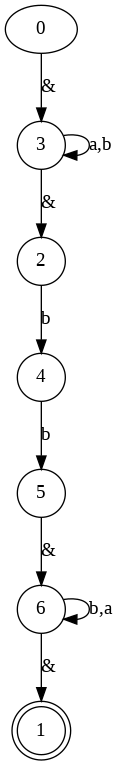

In [228]:
#Entrada 1
teste_1 = Automata()

# Inicializa os estados S0 e S1 (sendo S1 um estado final)
S0 = State('0')
S1 = State('1', final=True)
S2 = State('2')
S3 = State('3')
S4 = State('4')
S5 = State('5')
S6 = State('6')

# Adiciona os estados à e-NFA
teste_1.set_initial_state(S0)
teste_1.add_state(S1)
teste_1.add_state(S2)
teste_1.add_state(S3)
teste_1.add_state(S4)
teste_1.add_state(S5)
teste_1.add_state(S6)


# Adiciona as transições da e-NFA
teste_1.add_transition(S0, S3, '&')
teste_1.add_transition(S3, S3, 'a,b')
teste_1.add_transition(S3, S2, '&')
teste_1.add_transition(S2, S4, 'b')
teste_1.add_transition(S4, S5, 'b')
teste_1.add_transition(S5, S6, '&')
teste_1.add_transition(S6, S6, 'b,a')
teste_1.add_transition(S6, S1, '&')




# Imprime o resultado do passo I
filename = 'grafos/Q1_grafo_1.dot'
teste_1.print_graph(filename, view=False)
imagename = filename + '.png'
display(Image(filename=imagename))

In [0]:
#Vetores pra armazenar os epsilon fechos de cada estado. Vetor e[i] armazena o epsilon fecho do estado com label = 'i'
#O correto seria adicionar no epsilon fecho de cada estado o próprio estado, mas para fins de praticidade iremos suprimir tal fato
i = 0
while i<teste_1.node_count:
  e[i] = []
  i +=1

In [0]:
i = 0
while i < teste_1.node_count:
  #Conversao de i (inteiro -> char)
  p = chr(48+i)
  
  #Computando o epsilon fecho de todos os estados
  for transition in teste_1.transitions:
    if transition.from_state.label == p and transition.label == '&': 
      e[i].append(transition.to_state)
      aux = transition.to_state
      for transition in teste_1.transitions:
        if transition.from_state == aux and transition.label == '&':
         e[i].append(transition.to_state)
         aux = transition.to_state
         for transition in teste_1.transitions:
            if transition.from_state == aux and transition.label == '&':
              e[i].append(transition.to_state)
              aux = transition.to_state
              for transition in teste_1.transitions:
                if transition.from_state == aux and transition.label == '&':
                  e[i].append(transition.to_state)
                  aux = transition.to_state
                  for transition in teste_1.transitions:
                    if transition.from_state == aux and transition.label == '&':
                      e[i].append(transition.to_state)
                      aux = transition.to_state
                      for transition in teste_1.transitions:
                        if transition.from_state == aux and transition.label == '&':
                          e[i].append(transition.to_state)
                         
  
  i+=1
       

    

In [260]:
#Todo arco de Y em A gera um arco de X em A, para cada Y no epsilon fecho de X
i = 0
I = chr(48+i)
while i < teste_1.node_count:
  #Para todos os estados que possuem e-fecho nao vazio
  if e[i]:
    for chegada in e[i]:
      for transition in teste_1.transitions:
        if transition.from_state.label == chegada.label:
          #Adicionar arco do estado inicial para transition.to_state
          teste_1.add_transition(teste_1.states[I] , transition.to_state, transition.label)
          
  
  
  
  i += 1

RuntimeError: ignored